# Intro

In this notebook you will learn how to log different things to Neptune. 

There are snippets for everything you may want to log. 

You can jump direclty to the section that is interesting go through the whole thing.
Either way, enjoy!

**Note**

You can also [check the experiment](https://ui.neptune.ai/o/shared/org/step-by-step-monitoring-experiments-live/e/STEP-22/logs) where all the objects presented in this notebook were logged.

# Install

Install Neptune client and neptune-contrib the Neptune extensions library

In [2]:
pip install neptune-client neptune-contrib

Note: you may need to restart the kernel to use updated packages.


Import `neptune` library and initialize tracking.

I created a public project `shared/step-by-step-monitoring-experiments-live` where you can log as anonymous user neptuner (just use `api_token="ANONYMOUS"`).

Normally you need to pass your private `api_token` and the name of your  project.


# Start Experiment

In [3]:
import neptune

neptune.init(
    api_token="ANONYMOUS", # You can change it to your API token
    project_qualified_name="shared/step-by-step-monitoring-experiments-live" # You can change to your project
)

Project(shared/step-by-step-monitoring-experiments-live)

In [4]:
neptune.create_experiment('logging-snippets')

NVMLError: NVML Shared Library Not Found - GPU usage metrics may not be reported.


https://ui.neptune.ai/shared/step-by-step-monitoring-experiments-live/e/STEP-22


Experiment(STEP-22)

# Logging Snippets

## Metrics and Losses

In [5]:
neptune.log_metric('test_accuracy', 0.76)
neptune.log_metric('test_f1_score', 0.62)

In [6]:
import numpy as np

for i in range(100):
    fake_loss = np.random.random() - i/100
    neptune.log_metric('loss', fake_loss)

## Images

#### Log PIL.image

In [7]:
from PIL import Image
happy_dog_img = Image.open("happy_dog.jpg")
sad_dog_img = Image.open("sad_dog.jpg")

neptune.log_image('dogs', happy_dog_img)
neptune.log_image('dogs', sad_dog_img)

#### Log Numpy array

In [8]:
import numpy as np

x = 256 * np.random.random((50,200,3))
y = 256 * np.random.random((100,60,3))

neptune.log_image('heatmaps', x)
neptune.log_image('heatmaps', y)

#### Log Matplotlib figure 

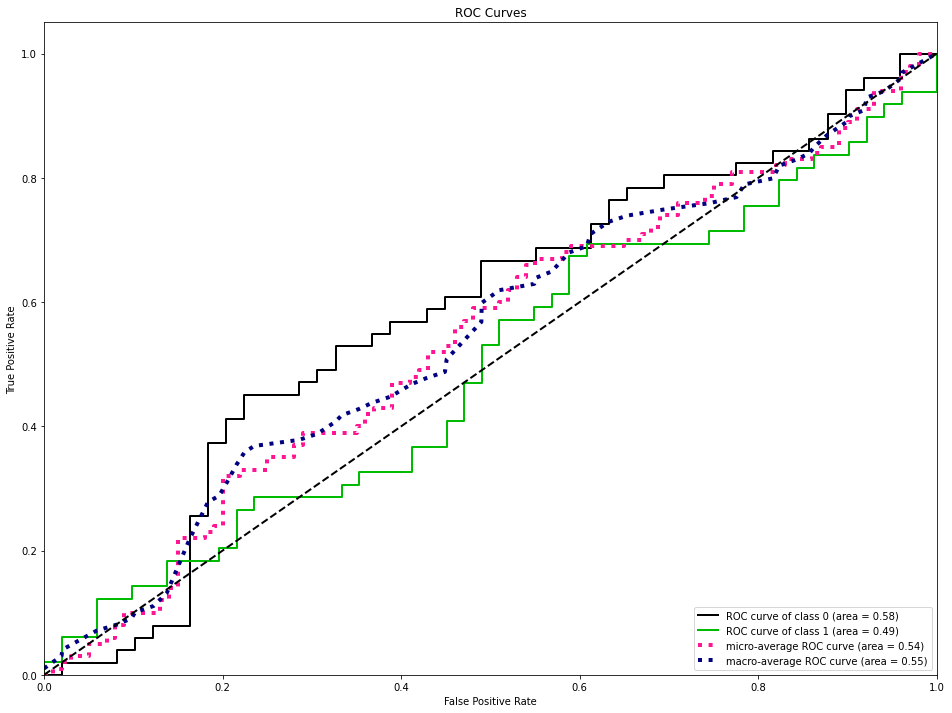

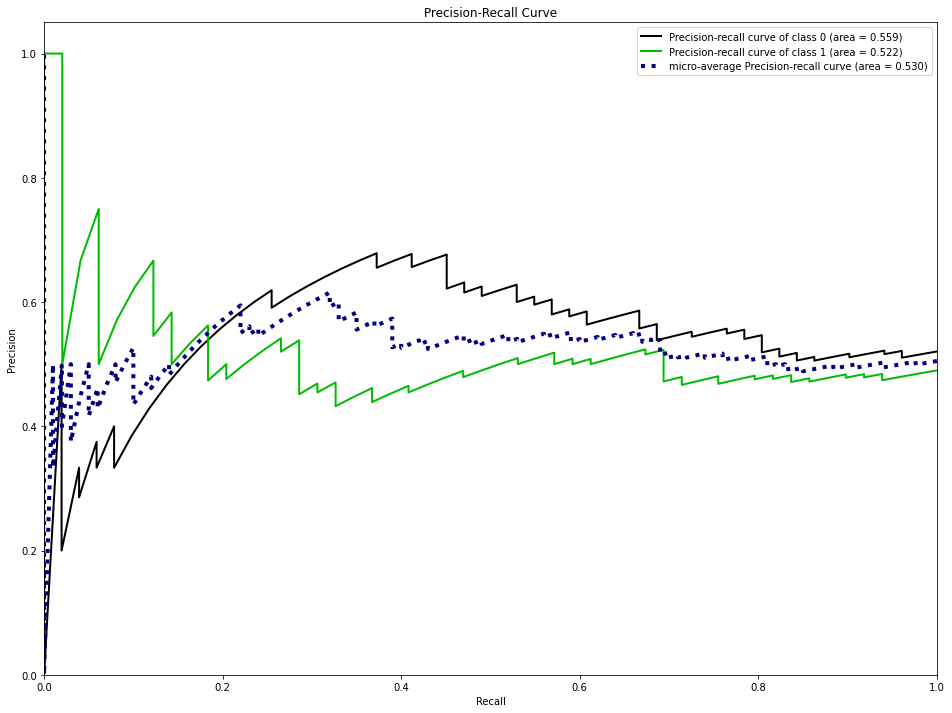

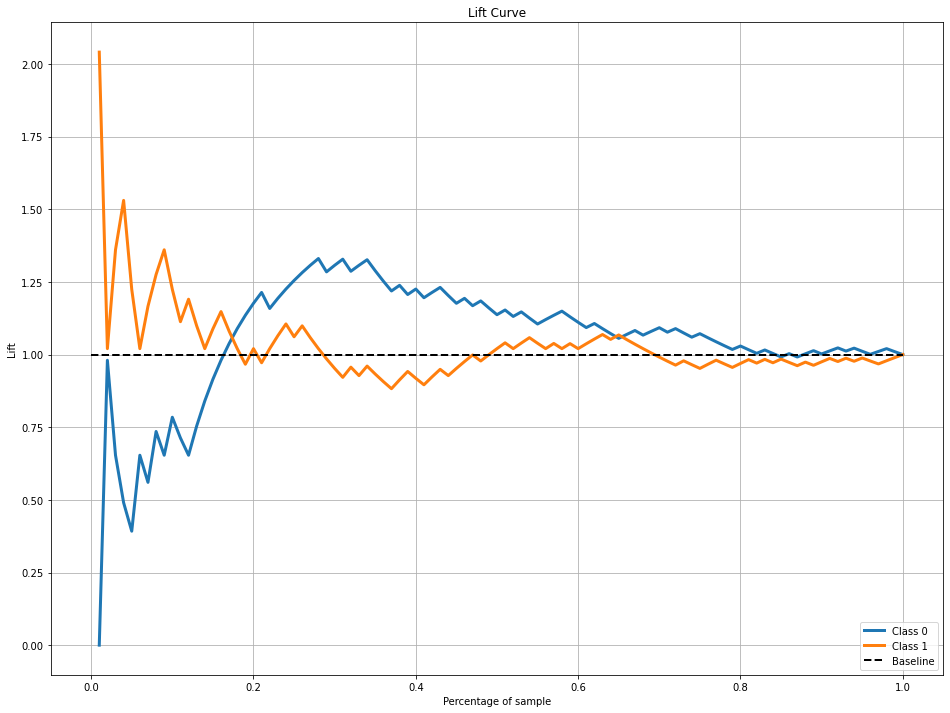

In [9]:
import matplotlib.pyplot as plt
from scikitplot.metrics import plot_roc, plot_precision_recall, plot_lift_curve

plt.rcParams['figure.figsize'] = (16, 12)

y_true = np.random.randint(2, size=100)
y_pred = np.random.random((100,2))

roc_fig, ax = plt.subplots()
plot_roc(y_true, y_pred, ax=ax)
neptune.log_image('performance_charts', roc_fig)

pr_fig, ax = plt.subplots()
plot_precision_recall(y_true, y_pred, ax=ax)
neptune.log_image('performance_charts', pr_fig)

lift_fig, ax = plt.subplots()
plot_lift_curve(y_true, y_pred, ax=ax)
neptune.log_image('performance_charts', lift_fig)

## Interactive Charts

#### Log Matplotlib figures as an interactive chart

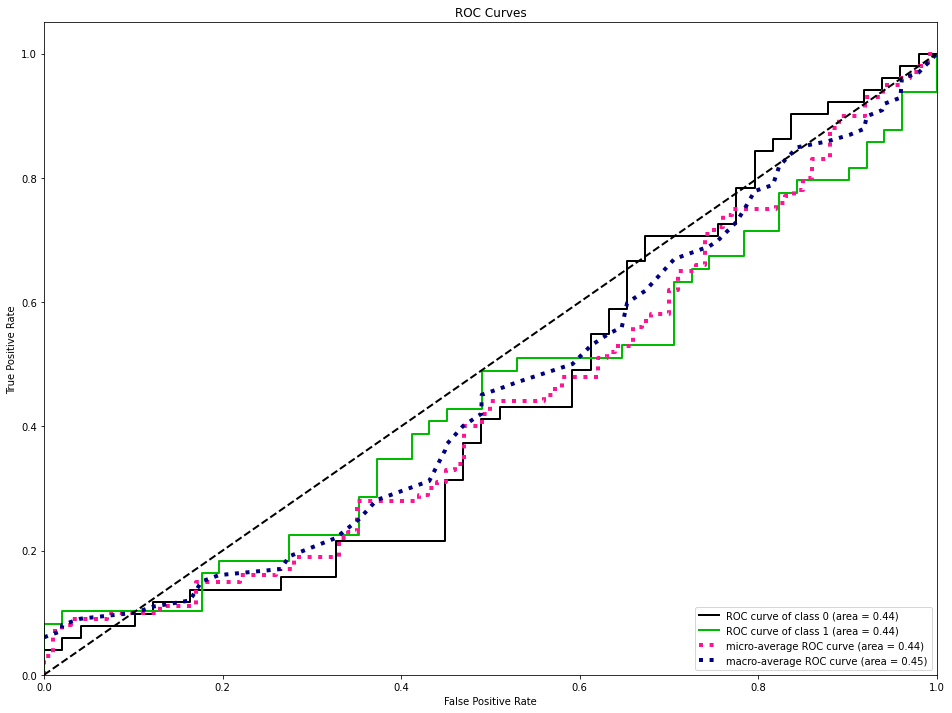

In [10]:
import matplotlib.pyplot as plt
from scikitplot.metrics import plot_roc, plot_precision_recall, plot_lift_curve

plt.rcParams['figure.figsize'] = (16, 12)

y_true = np.random.randint(2, size=100)
y_pred = np.random.random((100,2))

roc_fig, ax = plt.subplots()
plot_roc(y_true, y_pred, ax=ax)

In [11]:
from neptunecontrib.api import log_chart
log_chart('Matplotlib interactive', roc_fig)

#### Log Plotly chart

In [12]:
import plotly.express as px

df = px.data.iris()
plotly_fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width', color='species')

In [13]:
from neptunecontrib.api import log_chart
log_chart('Plotly', chart=plotly_fig)

#### Log Bokeh chart

In [14]:
import bokeh
from bokeh.models import LogColorMapper
from bokeh.palettes import Viridis6 as palette
from bokeh.plotting import figure

bokeh.sampledata.download()

from bokeh.sampledata.unemployment import data as unemployment
from bokeh.sampledata.us_counties import data as counties

palette = tuple(reversed(palette))

counties = {
    code: county for code, county in counties.items() if county["state"] == "tx"
}

county_xs = [county["lons"] for county in counties.values()]
county_ys = [county["lats"] for county in counties.values()]

county_names = [county['name'] for county in counties.values()]
county_rates = [unemployment[county_id] for county_id in counties]
color_mapper = LogColorMapper(palette=palette)

data=dict(
    x=county_xs,
    y=county_ys,
    name=county_names,
    rate=county_rates,
)

TOOLS = "pan,wheel_zoom,reset,hover,save"

p = figure(
    title="Texas Unemployment, 2009", tools=TOOLS,
    x_axis_location=None, y_axis_location=None,
    tooltips=[
        ("Name", "@name"), ("Unemployment rate", "@rate%"), ("(Long, Lat)", "($x, $y)")
    ])
p.grid.grid_line_color = None
p.hover.point_policy = "follow_mouse"

p.patches('x', 'y', source=data,
          fill_color={'field': 'rate', 'transform': color_mapper},
          fill_alpha=0.7, line_color="white", line_width=0.5)

Using data directory: /home/jakub/.bokeh/data
Skipping 'CGM.csv' (checksum match)
Skipping 'US_Counties.zip' (checksum match)
Skipping 'us_cities.json' (checksum match)
Skipping 'unemployment09.csv' (checksum match)
Skipping 'AAPL.csv' (checksum match)
Skipping 'FB.csv' (checksum match)
Skipping 'GOOG.csv' (checksum match)
Skipping 'IBM.csv' (checksum match)
Skipping 'MSFT.csv' (checksum match)
Skipping 'WPP2012_SA_DB03_POPULATION_QUINQUENNIAL.zip' (checksum match)
Skipping 'gapminder_fertility.csv' (checksum match)
Skipping 'gapminder_population.csv' (checksum match)
Skipping 'gapminder_life_expectancy.csv' (checksum match)
Skipping 'gapminder_regions.csv' (checksum match)
Skipping 'world_cities.zip' (checksum match)
Skipping 'airports.json' (checksum match)
Skipping 'movies.db.zip' (checksum match)
Skipping 'airports.csv' (checksum match)
Skipping 'routes.csv' (checksum match)
Skipping 'haarcascade_frontalface_default.xml' (checksum match)


GlyphRenderer(id='1037', ...)

In [15]:
from neptunecontrib.api import log_chart

log_chart(name='Bokeh', chart=p)

#### Log Altair chart

In [16]:
import altair as alt
from vega_datasets import data

source = data.cars()

brush = alt.selection(type='interval')

points = alt.Chart(source).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=alt.condition(brush, 'Origin:N', alt.value('lightgray'))
).add_selection(
    brush
)

bars = alt.Chart(source).mark_bar().encode(
    y='Origin:N',
    color='Origin:N',
    x='count(Origin):Q'
).transform_filter(
    brush
)

chart = points & bars

## Text

#### Logs

In [17]:
neptune.log_text('translated prediction', 'My translation attempt :)')

In [18]:
for i in range(100):
    params = {'lr':np.random.random(), 
              'tree_depth': np.random.randint(50),
              'num_leaves': np.random.randint(20)}
    neptune.log_text('run parameters', str(params))

#### properties

Those are key: value pairs of text

In [19]:
neptune.set_property('tutorial', 'definitely')

In [20]:
from time import sleep

for i in range(100):
    sleep(0.5)
    neptune.set_property('progress', 'iteration {}/100'.format(i))

#### tags

Those are sets of text 

In [21]:
neptune.append_tag('deployed')
neptune.append_tags(['great-experiment', 'fancy-network'])

## Objects, Files, and other Artifacts

In [22]:
from neptunecontrib.api import log_chart

log_chart(name='Altair', chart=chart)

#### .csv files

Will be rendered and shown as table

In [23]:
data.cars().to_csv('cars.csv', index=None)

In [24]:
neptune.log_artifact('cars.csv')

#### .html files

Will be rendered and shown as html

In [25]:
with open('button.html', 'w+') as f:
    html = """<button type='button', style='background-color:#005879; width:300px; height:200px; font-size:30px'>
    <a style='color: #ccc', href='https://docs.neptune.ai'> 
        Take me back to the docs!!
    <a>
    </button>"""
    f.write(html)

In [26]:
from neptunecontrib.api import log_chart

neptune.log_artifact('button.html')

#### image format files

In [27]:
neptune.log_artifact('happy_dog.jpg')

#### other files

In [28]:
from sklearn.ensemble import RandomForestClassifier
import joblib

rf = RandomForestClassifier()
joblib.dump(rf, 'my_model.pkl')

['my_model.pkl']

In [29]:
neptune.log_artifact('my_model.pkl')

#### Python objects as pickle

In [30]:
from sklearn.ensemble import RandomForestClassifier
import joblib

rf = RandomForestClassifier()

In [31]:
from neptunecontrib.api import log_pickle

log_pickle('random_forest.pkl', rf)

#### Pandas DataFrames

In [32]:
df = data.cars()

In [33]:
from neptunecontrib.api import log_table

log_table('cars_dataframe', df)

## Data Versions

#### Files

In [34]:
from neptunecontrib.versioning.data import log_data_version

log_data_version('cars.csv', prefix='cars_')

#### Directories

In [35]:
log_data_version('dogs_folder', prefix='dogs_')

#### Image Directory Snapshots

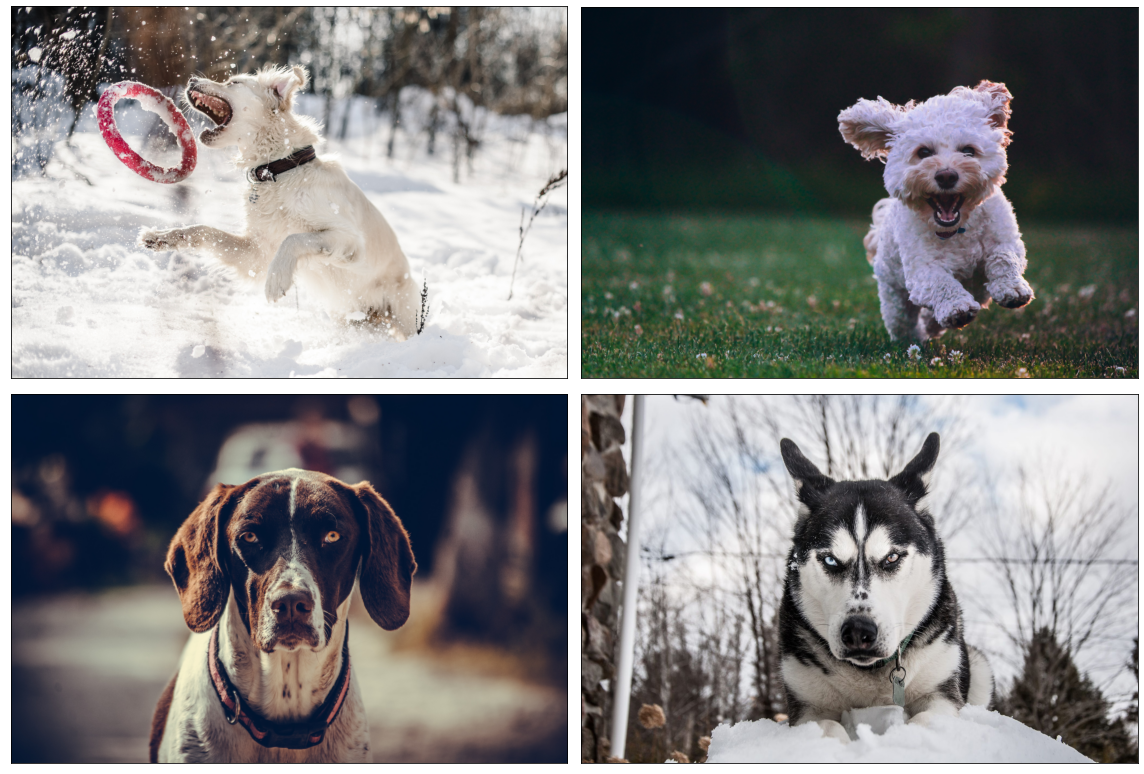

In [36]:
from neptunecontrib.versioning.data import log_image_dir_snapshots

log_image_dir_snapshots('dogs_folder/', sample=4)

#### S3 buckets

You need to specify your credentials

In [37]:
# from neptunecontrib.versioning.data import log_s3_data_version

# BUCKET = 'my-bucket'
# PATH = 'train_dir/'

# log_s3_data_version(BUCKET, PATH) 

# Stop Experiment

In [38]:
neptune.stop()


# Learn more about Neptune

Read about other Neptune features, create your free account and start logging!

[**Go to Neptune**](https://neptune.ai/experiment-tracking?utm_source=colab&utm_medium=notebook&utm_campaign=colab-examples&utm_content=step-by-step-monitoring-runs-live)
